***
<center> <h1> Lossless Compression Algorithms
    
*** 

## Authors
+ Samuel Isaac Venegas Santamaria
+ Guillermo Antonio Montes de Oca

----------------------

# Index
1. [Introduction](#Introduction)
2. [Huffman Encoding](#Huffman_Encoding)
3. [Methodology](#Methodology)
    + [Huffman Algorithm](#Huffman_Algorithm)
    + [Input String](#Input_string)
4. [Results](#Results)
    + [Huffman](#Huffman)
    + [Zlib](#Zlib)
    + [LZ4](#LZ4)
    + [BZ2](#BZ2)
5. [Comparison](#Comparison)
6. [Conclusion](#Conclusion)
7. [References](#References)

-----------------------

# Introduction  <a name="Introduction"></a>
Data Science is intrinsically data-driven, where many interdisciplinary sciences are applied together to extract meaning and insights from available business data. As businesses get increasingly data-dependent, the importance of Data Science as the ultimate decision-making. Nowadays, the volume of data that is considered relevant to businesses is increasing quickly year-over-year, and as the functional quality of data increases, storage capacity concerns have to be resolved. That is why most businesses rely on data compression, especially for those small and medium enterprises that need to optimized costs and resources. 

The main advantages of compression are reductions in storage hardware, data transmission time, and communication bandwidth. Compressed files require significantly less storage capacity than uncompressed files, meaning a significant decrease in expenses for storage. A compressed file also requires less time for transfer while consuming less network bandwidth, this also increases productivity. The data compression has been one of the enabling technologies for the on-going digital multimedia revolution for decades which resulted in renowned algorithms like Huffman Encoding or LZ77, considered as lossless data algorithms.

----------------------------

# Huffman Encoding <a name="Huffman_Encoding"></a>

In this method, the Huffman encoding algorithm is used to encode text data. The term refers to the use of a variable-length code table for encoding a source symbol (a character in a file) where the variable-length code table has been derived in a particular way based on the estimated probability of occurrence for each possible value of the source symbol. The principle is to use a lower number of bits to encode the data that occurs more frequently. The average length of a Huffman code depends on the statistical frequency with which the source produces each symbol from its alphabet.

--------------------------------

# Methodology  <a name="Methodology"></a>


In order to optimaze the storage for databases, we are to use four lossless compression algorithms (including our Huffman algorithm) to reduce the size of an input text. Then, compare the results sizes and conclude which one is the best for usability. Also, in the [Results](#Results) section will be shown an approximation of the time it takes for each loop, and how many loops it takes each one. Fortunately, apart from our algorithm ([Huffman](#Huffman_Algorithm)), Python&trade; contains the others as libraries. Thefore, the algorithms to use are:

+ Huffman
+ Zlib
+ LZ4
+ BZ2 

----------------------

In [1]:
import collections
import heapq
import zlib
import lz4.frame
import bz2
import os
import time
import matplotlib.pyplot as plt
import numpy as np

### Huffman Algorithm  <a name="Huffman_Algorithm"></a>

In [3]:
class TreeNode(object):
    def __init__(self, val=None, count=1, left=None, right=None, code = ""):
        self.count = count
        self.val = val
        self.left = left
        self.right = right
        self.code = code

    def leaf(self):
        return not (self.left or self.right)

    def __lt__(self, other):
        return self.count < other.count

    def __add__(self, other):
        self.code = 0
        other.code = 1
        return TreeNode(None, self.count + other.count, self, other)

    def __repr__(self):
        return "TreeNode(%r, %r)" % (self.val, self.count)
    
    
def HuffmanTree(text):
    #Receives text, makes a tree and returns a dictionary

    counter = collections.Counter(text)
    heap = [TreeNode(item,count) for item,count in counter.items()]

    heapq.heapify(heap)
    
    while len(heap) >= 2:
        heapq.heappush(heap, heapq.heappop(heap) + heapq.heappop(heap))

    tree = heap[0]    
    return HuffmanTreeToCode(tree)

def HuffmanTreeToCode(node, pfix=[]):
    #Transverse trough the nodes in a tree, trasnlate to binary dictionary
    
    code = {}
    if node:
        pfix = pfix + [node.code]
        if node.leaf():
            code[node.val] = pfix
        else:
            code.update(HuffmanTreeToCode(node.left, pfix))
            code.update(HuffmanTreeToCode(node.right, pfix))
    return code


def encrypt(text, code):
    ##Encrypts the text with the given coding dictionary, using char as index key
    
    crypted = []
    for char in text:
        crypted.extend(code[char])

    return "".join(str(v) for v in crypted)

def decrypt(text, code):
     ##Decrypts the text with the given coding dictionary.
    cstring = ""
    decrypted = []
    
    reversezip = dict(zip(["".join([str(j) for j in i]) for i in code.values()], code.keys()))

    for c in text:
        cstring += c
        if cstring in reversezip:
            decrypted.append(reversezip[cstring])
            cstring = ""
    return "".join(decrypted)

def main(text):
    start = time.time()
    code = HuffmanTree(text)
    crypted_text = encrypt(text, code)
    end = time.time()
    print(end - start) #this only demonstrates the loops work. %timeit provides better analysis
    return crypted_text

--------------------
### Input string  <a name="Input_string"></a>
`Freddies_Message` contains our input to test the compression algorithms, but the following functions can't take strings as input, so `.encode()` must be used to encode the message 

In [30]:
Freddies_Message = "Empty spaces, what are we living for? Abandoned places, I guess we know the score, on and on Does anybody know what we are looking for? Another hero, another mindless crime Behind the curtain, in the pantomime Hold the line Does anybody want to take it anymore? The show must go on The show must go on, yeah Inside my heart is breaking My makeup may be flaking But my smile, still, stays on Whatever happens, I'll leave it all to chance Another heartache, another failed romance, on and on Does anybody know what we are living for? I guess I'm learning I must be warmer now I'll soon be turning, round the corner now Outside the dawn is breaking But inside in the dark I'm aching to be free The show must go on The show must go on Inside my heart is breaking My makeup may be flaking But my smile, still, stays on My soul is painted like the wings of butterflies Fairy tales of yesterday, grow but never die I can fly, my friends The show must go on The show must go on I'll face it with a grin I'm never giving in On with the show I'll top the bill I'll overkill I have to find the will to carry on On with the show Show Show must go on, go on, go on, go on, go on, go on, go on, go on"

input_data = Freddies_Message.encode()
print("The input length is: {} bytes".format(len(encoded*8)))

The input length is: 9488 bytes


-----------------
# Results  <a name="Results"></a>

We are to get results about every algorithm yield and compare them in order to conclude which one is the best for the application in compressing text data as it is stated in the [Methodology](#Methodology)

### Huffman<a name="Huffman"></a>

In [5]:
%timeit main(input_data)

11.631493330001831
12.272532939910889
20.899744987487793
14.83135986328125
12.139934539794922
13.404434204101562
11.104682683944702
11.098860502243042
13.7 s ± 3.19 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
Huffman = main(input_data)
Huffman_len = len(Huffman)
print("Huffman Algorithm resized the input to {} bytes".format(Huffman_len))

0.008001327514648438
Huffman Algorithm resized the input to 5171 bytes


### Zlib<a name="Zlib"></a>

In [8]:
%timeit zlib.compress(input_data, 6)

30.8 ms ± 1.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
Zlib_1 = zlib.compress(input_data, 6)
Zlib_len = len(Zlib_1)
print("Zlib Algorithm resized the input to {} bytes".format(Zlib_len))

Zlib Algorithm resized the input to 498 bytes


### LZ4 <a name="LZ4"></a>

In [11]:
%timeit lz4.frame.compress(input_data) 

788 µs ± 89.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
lz4_1 = lz4.frame.compress(input_data)
lz4_1_len = len(lz4_1)
print("LZ4 Algorithm resized the input to {} bytes".format(lz4_1_len))

LZ4 Algorithm resized the input to 773 bytes


### BZ2 <a name="BZ2"></a>

In [14]:
%timeit bz2.compress(input_data)

4.7 s ± 258 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
bz2_1 = bz2.compress(input_data)
bz2_len = len(bz2_1)
print("BZ2 Algorithm resized the input to {} bytes".format(bz2_len))

BZ2 Algorithm resized the input to 9136 bytes


--------------------
# Comparison <a name="Comparison"></a>
The plot shows how efficient are the algorithms: the less is the size of `reduzed size` bar, the better is considered the algorithm.

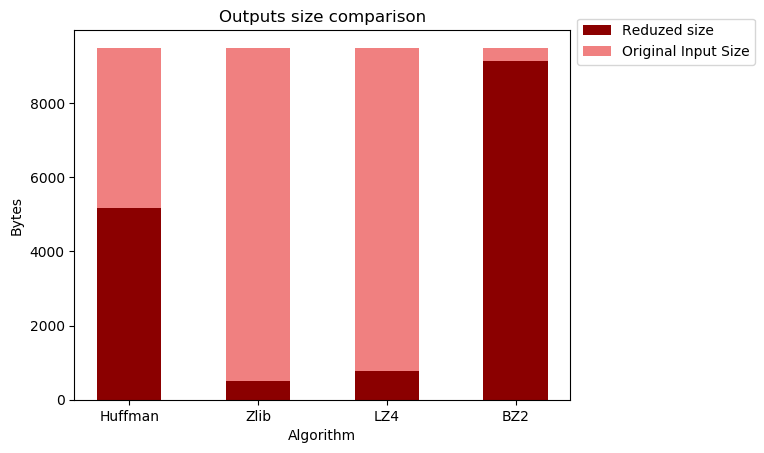

In [50]:
labels = ['Huffman', 'Zlib', 'LZ4', 'BZ2']
performance  = [Huffman_len, Zlib_len, lz4_1_len, bz2_len]
input_size =len(encoded*8)
Difference_of_Size = [int(input_size-Huffman_len), int(input_size-Zlib_len),
               int(input_size-lz4_1_len), int(input_size-bz2_len)]

width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, performance, width, label='Reduzed size', color = 'darkred')
ax.bar(labels, Difference_of_Size, width, bottom=performance,
       label='Original Input Size', color='lightcoral')

ax.set_ylabel('Bytes')
ax.set_xlabel('Algorithm')
ax.set_title('Outputs size comparison')
ax.legend(bbox_to_anchor=(1, 1.05))

plt.show()

--------------------
# Conclusion  <a name="Conclusion"></a>

As we described, the objective of this is to compare the four algorithms (including our Huffman algorithm) in compressing text data to save storage as much as we can in databases. Given a text input of 9488 bytes, the graph shows that Zlib is the best algorithm to use in our case of application, reducing the text to 498 bytes (-94.7%).
Our Huffman algorithm reduced the input text to 5171 bytes (-45%), concluding that it is a good compression, but not as efficient as the others in text compression. Therefore, it is not efficient in our application.

---------------------
# References <a name="References"></a>

Nikhil Pawar. (2014). Effective Text Clustering Method Based on Huffman Encoding Algorithm. *International Journal of Science and Research (IJSR)*. *Volume 3*. Issue 12. Web site: https://www.ijsr.net/archive/v3i12/U1VCMTQ1NjE=.pdf


Oswald, C. and Sivaselvan, B. (2018). Text and Image Compression based on Data Mining Perspective. *Data Science Journal*. 17. p.12. DOI: http://doi.org/10.5334/dsj-2018-012

Programiz. (*n.d*). Huffman Coding. [Online]. Retrieved from web site: https://www.programiz.com/dsa/huffman-coding 

Python Software Foundation. (2020). Support for bzip2 compression. [Online]. Retrieved from https://docs.python.org/3/library/bz2.html  

Python Software Foundation. (2020). LZ4 Bindings for Python. [Online]. Retrieved from https://pypi.org/project/lz4/  


Python Software Foundation. (2020).Compression compatible with gzip. [Online]. Retrieved from https://docs.python.org/3/library/zlib.html  






-------------------